1) Import the necessary modules

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

2) Load the dataset and analyze its features

In [36]:
df=pd.read_csv("IMDB-Dataset.csv")

print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


3) Cleaning the words

In [37]:
def cleanwords(df: pd.DataFrame):
  temp=' '.join(df["review"])
  temp=temp.lower()
  text=re.sub(r"[^a-zA-Z\s']",' ',temp)
  textlist = [word for word in text.split() if word not in STOPWORDS and word!="br"]
  return textlist

In [41]:
pos_list=cleanwords(df[df["sentiment"]=="positive"])
neg_list=cleanwords(df[df["sentiment"]=="negative"])

poswords=Counter(pos_list).most_common(40)
negwords=Counter(neg_list).most_common(40)

pos_set = set([item[0] for item in poswords])
neg_set = set([item[0] for item in negwords])

noise_set = pos_set.intersection(neg_set)

4) Displaying the Word Cloud

In [42]:
def genwordcloud(textlist,noiseset):
  filteredtextlist=[word for word in textlist if word not in noiseset]
  text = ' '.join(filteredtextlist)
  wc=WordCloud(width=800,height=400,background_color="white")
  wc.generate(text)
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

--- POSITIVE REVIEWS (Noise Removed) ---


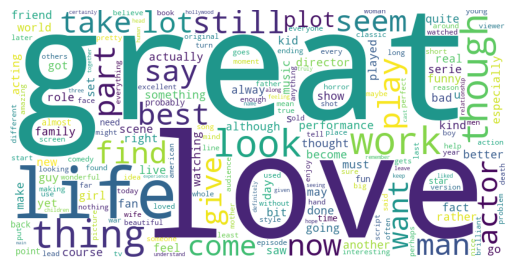

In [ ]:
genwordcloud(pos_list, noise_set)

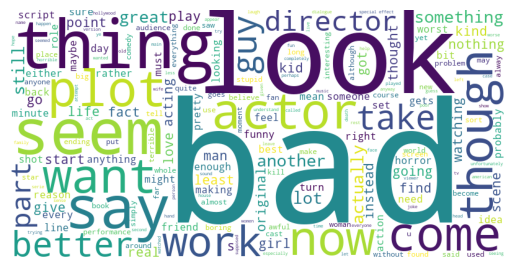

In [44]:
genwordcloud(neg_list, noise_set)

5) TOP 20 WORDS BAR CHART

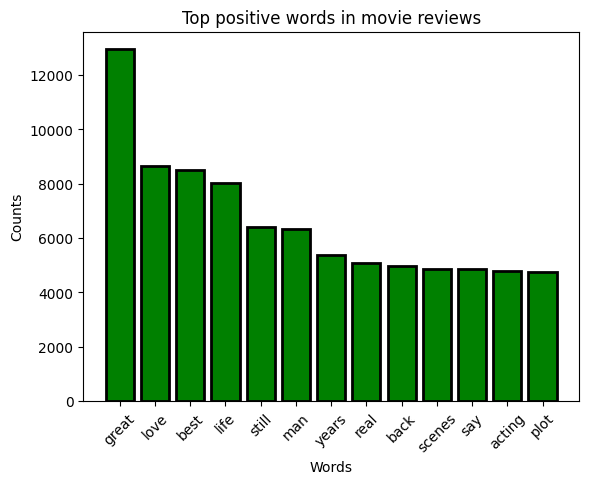

In [58]:
topposlist=Counter(pos_list).most_common(45)

words=[item[0] for item in topposlist if item[0] not in noise_set]
counts=[item[1] for item in topposlist if item[0] in words]

plt.bar(words,counts,color='green',edgecolor='black',linewidth=2)
plt.title("Top positive words in movie reviews")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

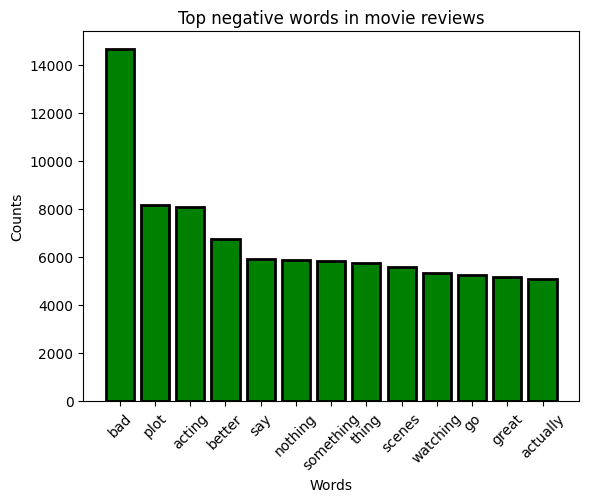

In [59]:
topneglist=Counter(neg_list).most_common(45)

words=[item[0] for item in topneglist if item[0] not in noise_set]
counts=[item[1] for item in topneglist if item[0] in words]

plt.bar(words,counts,color='green',edgecolor='black',linewidth=2)
plt.title("Top negative words in movie reviews")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()